In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
#PassengerId column as the index column
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [9]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

PassengerId: a unique identifier for each passenger

Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.

Pclass: passenger class.

Name, Sex, Age: self-explanatory

SibSp: how many siblings & spouses of the passenger aboard the Titanic.

Parch: how many children & parents of the passenger aboard the Titanic.

Ticket: ticket id

Fare: price paid (in pounds)

Cabin: passenger's cabin number


Embarked: where the passenger embarked the Titanic

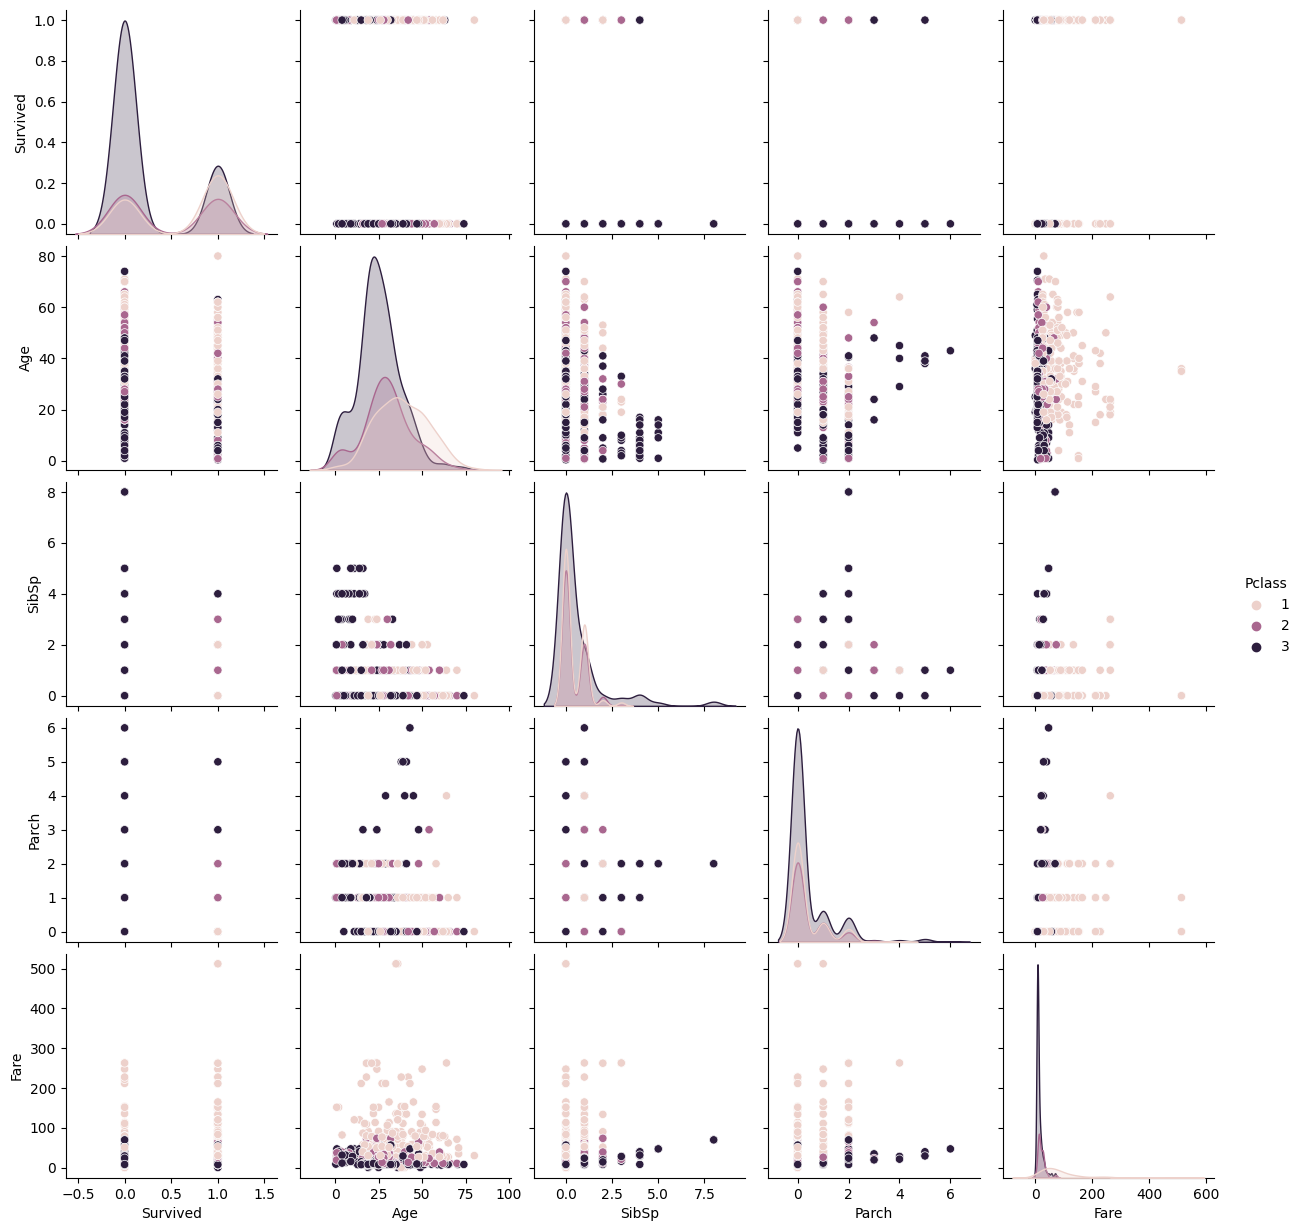

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train.select_dtypes(['number']), hue='Pclass')
plt.show()

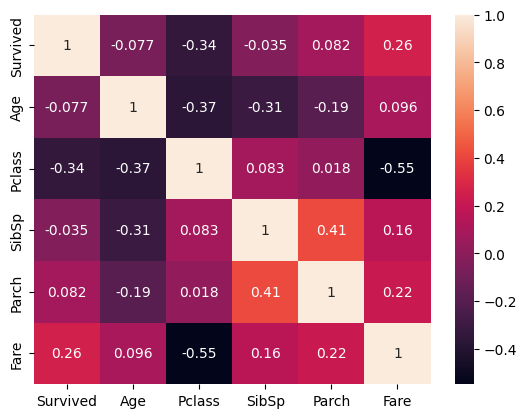

In [15]:
sns.heatmap(train[['Survived','Age','Pclass','SibSp','Parch','Fare']].corr(), annot=True)
plt.show()

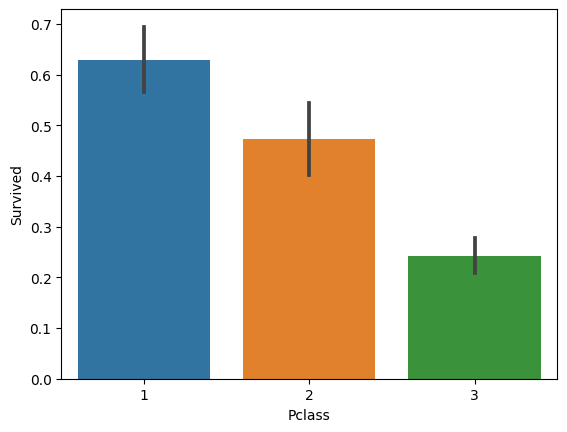

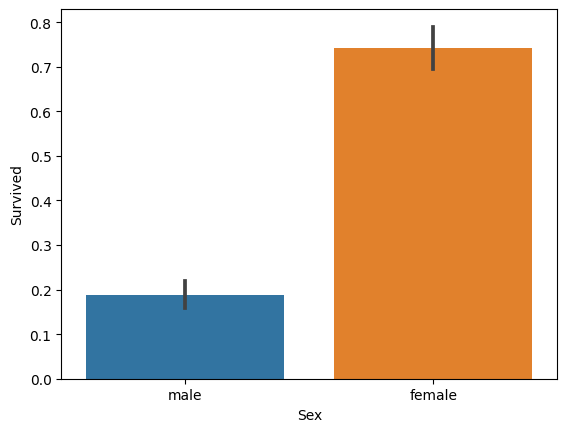

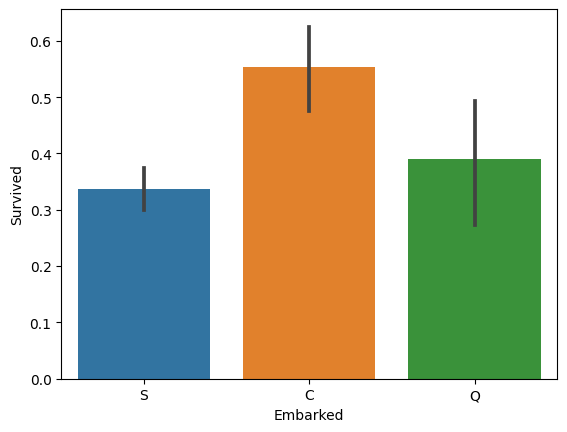

In [33]:

# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

# Survival rate by sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.show()

# Survival rate by embarkation port
sns.barplot(x='Embarked', y='Survived', data=train)
plt.show()


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [17]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse_output=False)),
])


In [18]:
from sklearn.compose import ColumnTransformer


num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


In [19]:
X_train = preprocess_pipeline.fit_transform(train)

y_train = train["Survived"]

In [20]:
!pip install optuna

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import optuna
import logging


optuna.logging.set_verbosity(optuna.logging.WARNING)


# Initialize Stratified K-Fold
strat_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Optuna Setup for Hyperparameter Tuning


# RandomForestClassifier
def rf_objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 100),
        'max_depth': trial.suggest_int('max_depth', 10, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    rf_model = RandomForestClassifier(**param, random_state=42)
    score = cross_val_score(rf_model, X_train, y_train, cv=strat_kf, scoring='accuracy')
    return np.mean(score)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(rf_objective, n_trials=15)


# SVC
def svc_objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-3, 100, log=True),
        'gamma': trial.suggest_float('gamma', 1e-3, 100, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf'])
    }
    svc_model = SVC(**param)
    score = cross_val_score(svc_model, X_train, y_train, cv=strat_kf, scoring='accuracy')
    return np.mean(score)

study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(svc_objective, n_trials=15)

# XGBClassifier
def xgb_objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5)}
    
    xgb_model = XGBClassifier(**param, random_state=42)
    score = cross_val_score(xgb_model, X_train, y_train, cv=strat_kf, scoring='accuracy')
    return np.mean(score)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(xgb_objective, n_trials=15)


# Cross-Validation and Model Evaluation with Stratified K-Fold

# Evaluate RandomForestClassifier with best parameters
rf_best_params = study_rf.best_params
rf_model_best = RandomForestClassifier(**rf_best_params, random_state=42)
rf_scores = cross_val_score(rf_model_best, X_train, y_train, cv=strat_kf, scoring='accuracy')
print("Random Forest Accuracy:", np.mean(rf_scores))

# Evaluate SVC with best parameters
svc_best_params = study_svc.best_params
svc_model_best = SVC(**svc_best_params)
svc_scores = cross_val_score(svc_model_best, X_train, y_train, cv=strat_kf, scoring='accuracy')
print("SVC Accuracy:", np.mean(svc_scores))

# Evaluate XGBClassifier with best parameters
xgb_best_params = study_xgb.best_params
xgb_model_best = XGBClassifier(**xgb_best_params, random_state=42)
xgb_scores = cross_val_score(xgb_model_best, X_train, y_train, cv=strat_kf, scoring='accuracy')
print("XGBClassifier Accuracy:", np.mean(xgb_scores))

Random Forest Accuracy: 0.8428731762065095
SVC Accuracy: 0.8215488215488215
XGBClassifier Accuracy: 0.8327721661054994


In [22]:
rf_model_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=4,
                       min_samples_split=6, n_estimators=85, random_state=42)

In [23]:
X_test = preprocess_pipeline.transform(test)
y_pred_test = rf_model_best.predict(X_test)


In [31]:
submission = pd.DataFrame({
    "PassengerId": test.index, 
    "Survived": y_pred_test
})
submission.to_csv('submission.csv', index=False)